В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
raw_df = pd.read_csv('train.csv')

In [12]:
 # спочатку перевіряю, що всередині датасету
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [13]:
raw_df.shape

(15000, 14)

In [14]:
raw_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  str    
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  str    
 5   Gender           15000 non-null  str    
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), str(3)
memory usage: 1.9 MB


Одразу видно, що переважають таки числові дані, хоча є декілька стрінгів.

In [29]:
#для ознайомлення зі stratify та іншою документацією

train_test_split?

In [28]:
raw_df["Exited"].value_counts(normalize=True)

Exited
0.0    0.796533
1.0    0.203467
Name: proportion, dtype: float64

У нас незбалансовані класи в таргеті. В результаті у нас може бути різний розподіл в тренувальному та валідаційному ніж у всьому наборі даних, що вплине на значення метрик. Тому необхіднити прибрати такий ризик, тому я спробую використати стратіфай.

In [41]:
train_df, val_df = train_test_split(raw_df, test_size=0.25, random_state=42, stratify=raw_df["Exited"]) 
#test_size зробив 25%, бо в нас спліт на тренувальний та валідаційний (як рекомендується в лекції). Також stratify для таргета.

In [44]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (11250, 14)
val_df.shape : (3750, 14)


In [42]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8263,8263,15679299.0,Toscani,696.0,France,Male,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41,0.0
14199,14199,15804862.0,Kuo,632.0,Germany,Female,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04,1.0
1856,1856,15613140.0,Ejimofor,679.0,France,Female,22.0,4.0,0.00,2.0,1.0,1.0,162599.54,0.0
3013,3013,15651955.0,Onochie,705.0,France,Male,48.0,3.0,0.00,2.0,1.0,0.0,119814.25,0.0
8266,8266,15768471.0,Chukwuemeka,696.0,France,Female,35.0,7.0,0.00,2.0,1.0,0.0,100423.88,0.0


In [43]:
val_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1855,1855,15751177.0,Bitter,543.0,France,Male,29.0,9.0,119688.81,1.0,0.0,0.0,55815.62,0.0
1273,1273,15685536.0,Ting,598.0,Germany,Male,41.0,3.0,123863.64,1.0,1.0,0.0,176868.89,0.0
5414,5414,15710456.0,Maclean,621.0,France,Male,31.0,7.0,0.00,1.0,1.0,1.0,150242.44,0.0
10923,10923,15610355.0,Chiang,597.0,France,Male,56.0,3.0,0.00,4.0,1.0,0.0,102936.71,1.0
5835,5835,15778947.0,Oluchi,749.0,Spain,Female,42.0,5.0,0.00,1.0,1.0,1.0,181794.86,1.0


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [111]:
input_cols = list(train_df.columns)[3:-1] 
#в цьому наборі даних можна ігнорувати як номер по порядку, так і айді кастомера та прізвище. Відповідно input_cols одразу з 4го стовпчика беру. Хоча підозрюю, що в певних випадках прізвище може бути важличе, якщо, наприклад, досліджуєш певні етнічні питання.
target_col = 'Exited'

In [102]:
print(input_cols)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [103]:
target_col

'Exited'

In [104]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [105]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [106]:
train_targets.value_counts(normalize=True) #цікаво перевірити, чи справді stratify зробив такий самий розподіл класів в таргеті.

Exited
0.0    0.796533
1.0    0.203467
Name: proportion, dtype: float64

In [107]:
val_targets.value_counts(normalize=True)

Exited
0.0    0.796533
1.0    0.203467
Name: proportion, dtype: float64

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [57]:
import numpy as np

In [108]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

C:\Users\yevhe\AppData\Local\Temp\ipykernel_39664\2397943287.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = train_inputs.select_dtypes('object').columns.tolist()


In [112]:
print("Числові:", numeric_cols)
print("Категоріальні:", categorical_cols)

Числові: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Категоріальні: ['Geography', 'Gender']


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

**Зайві колонки даних видалив ще в завданні 2, коли визначав input_cols. Очевидно, що айді клієнта, його прізвище та номер запису нам не потрібні.**

In [110]:
raw_df[numeric_cols].isna().sum() #перевірив, чи є пропущені значення. Їх немає, тому це неактуально для цього набору даних.

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [113]:
train_df[numeric_cols].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,696.0,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,632.0,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,679.0,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,705.0,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,696.0,35.0,7.0,0.00,2.0,1.0,0.0,100423.88


In [114]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00
mean,658.99,37.69,5.02,42952.89,1.59,0.79,0.49,117904.96
std,72.12,8.14,2.78,59923.39,0.53,0.41,0.50,45553.03
min,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83155.87
50%,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123587.94
75%,709.00,42.00,7.00,109863.19,2.00,1.00,1.00,156774.94
max,850.00,72.00,10.00,209767.31,4.00,1.00,1.00,199992.48


**Очевидно, потрібно провести масштабування числових ознак.**

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()

In [117]:
scaler.fit(train_inputs[numeric_cols])

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [118]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [119]:
train_inputs[numeric_cols].describe().round(2) #перевірка

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00
mean,0.54,0.36,0.50,0.20,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.29,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.26,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.35,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.44,0.70,0.52,0.33,1.00,1.00,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [120]:
val_inputs[numeric_cols].describe().round(2) #перевірка

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,3750.00,3750.00,3750.00,3750.00,3750.00,3750.00,3750.00,3750.00
mean,0.54,0.37,0.50,0.20,0.20,0.78,0.49,0.59
std,0.17,0.16,0.28,0.28,0.18,0.41,0.50,0.23
min,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.26,0.30,0.00,0.00,1.00,0.00,0.41
50%,0.55,0.35,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.44,0.70,0.52,0.33,1.00,1.00,0.79
max,1.00,1.04,1.00,0.89,1.00,1.00,1.00,1.00


**Кодування категоріальних ознак**

In [123]:
raw_df[categorical_cols].nunique() #маємо лише дві категоріальні змінні

Geography    3
Gender       2
dtype: int64

In [122]:
from sklearn.preprocessing import OneHotEncoder

In [124]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [125]:
encoder.fit(train_inputs[categorical_cols])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",False
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_cate

In [127]:
encoder.categories_ #перевіряю, які є категорії

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [129]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) #генеруємо стовпці для кожної нової категорії
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [130]:
encoder.transform(train_inputs[categorical_cols])[:5]

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [131]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [132]:
train_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,France,Female,0.277778,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
7687,0.510740,Spain,Male,0.277778,0.3,0.417325,0.000000,1.0,0.0,0.675392,0.0,0.0,1.0,0.0,1.0
8143,0.453461,France,Male,0.203704,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0
11512,0.379475,Spain,Male,0.444444,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,0.0,1.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [133]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (11250, 15)
train_targets: (11250,)
val_inputs: (3750, 15)
val_targets: (3750,)


In [135]:
import pyarrow as pa

In [137]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [138]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

CPU times: total: 31.2 ms
Wall time: 17.1 ms


Перевіряю, чи збереглися файли:

In [143]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0C8B-602A

 Directory of C:\Users\yevhe\OneDrive\Documents\ML_Course\Module 2.2 2.0\Kaggle 2.0

20.02.2026  19:26    <DIR>          .
20.02.2026  19:23    <DIR>          ..
16.02.2026  00:30    <DIR>          .ipynb_checkpoints
20.02.2026  19:26           148я713 HW_2_2_‹®Ј?бвЁз­ _аҐЈаҐб?п_§_scikit_learn_Anhel_Y.ipynb
15.02.2026  23:36            15я138 regression_data.csv
16.02.2026  00:29           100я010 sample_submission.csv
16.02.2026  00:29           801я708 test.csv
16.02.2026  00:29         1я249я869 train.csv
20.02.2026  19:25           218я773 train_inputs.parquet
20.02.2026  19:26            68я731 train_targets.parquet
20.02.2026  19:25            88я656 val_inputs.parquet
20.02.2026  19:26            23я425 val_targets.parquet
               9 File(s)      2я715я023 bytes
               3 Dir(s)  652я171я481я088 bytes free


Файли збереглися. Є 4 файлики в папці, створені якраз 20 лютого о 19:25

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
model = LogisticRegression(solver='liblinear')

In [148]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [152]:
X_val.head() #перевірив, що справді лише потрібні змінні.Оригінальні категоріальні змінні відсутні

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1855,0.267303,0.203704,0.9,0.570579,0.0,0.0,0.0,0.279047,1.0,0.0,0.0,0.0,1.0
1273,0.398568,0.425926,0.3,0.590481,0.0,1.0,0.0,0.884371,0.0,1.0,0.0,0.0,1.0
5414,0.453461,0.240741,0.7,0.000000,0.0,1.0,1.0,0.751226,1.0,0.0,0.0,0.0,1.0
10923,0.396181,0.703704,0.3,0.000000,1.0,1.0,0.0,0.514675,1.0,0.0,0.0,0.0,1.0
5835,0.758950,0.444444,0.5,0.000000,0.0,1.0,1.0,0.909003,0.0,0.0,1.0,1.0,0.0


In [153]:
model.fit(X_train, train_targets)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [154]:
model.coef_.round(2)

array([[-0.83,  8.16, -0.09, -1.09, -3.93, -0.18, -1.24,  0.18, -0.97,
         0.6 , -1.05, -0.27, -1.15]])

In [155]:
print(model.coef_.tolist())

[[-0.8265458309935638, 8.158907923852057, -0.08727744139925264, -1.090864444543683, -3.930981090159416, -0.18054548958883468, -1.243556933272047, 0.18051471298517327, -0.9721317214819752, 0.6048195654516276, -1.0536746607049017, -0.27142552808159875, -1.149561288653699]]


In [156]:
print(model.intercept_)

[-1.42098682]


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якість моделі? Вона хороша, погана, задовільна?

**Confusion matrix**

In [171]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.95971432, 0.04028568],
       [0.45784185, 0.54215815]])

In [173]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 87.48%


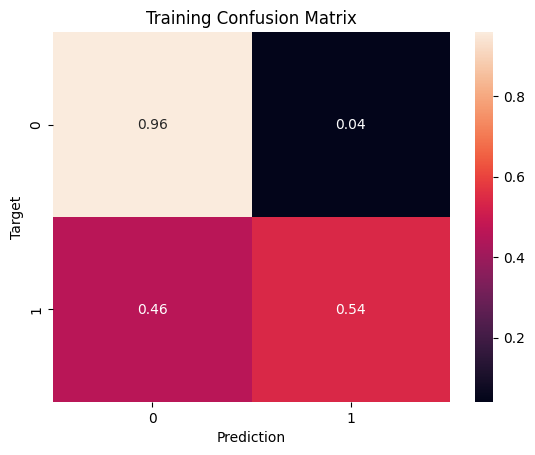

In [174]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 87.09%


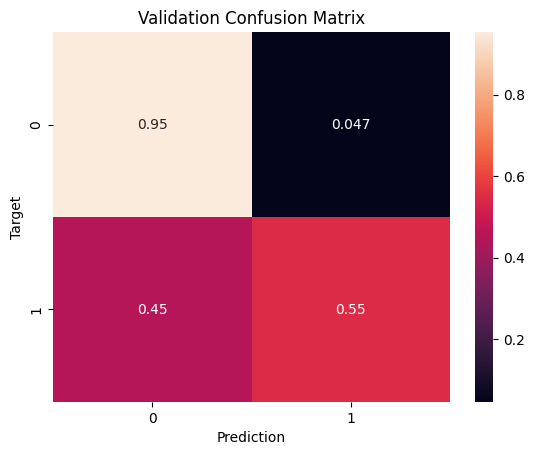

In [175]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

**На тестовому наборі даних точність 87%, а на валідаційному - 87% теж. Тобто модель добре узагальнює всі дані, навіть якщо їх не бачила. Але нагадую, що в нас переважає суттєво 0 в таргеті - 80% проти 20. Тому можливо, що модель передбачає добре в першу чергу оці 0. Тому треба дивитися на confusion matrix. І там якраз ми бачимо, що модель справді дуже добре передбачає 0 в таргеті. Частка TP 95-96 і для тренувального, і для валідаційного. Однак досить погано передбачає відповідь "1". Частка точних передбачень лише 54-55 в обох наборах.**

**ROC / AUROC**

In [184]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

In [185]:
train_targets

8263     0.0
14199    1.0
1856     0.0
3013     0.0
8266     0.0
        ... 
9493     0.0
7687     1.0
8143     0.0
11512    0.0
1292     1.0
Name: Exited, Length: 11250, dtype: float64

AUROC for Training: 0.88


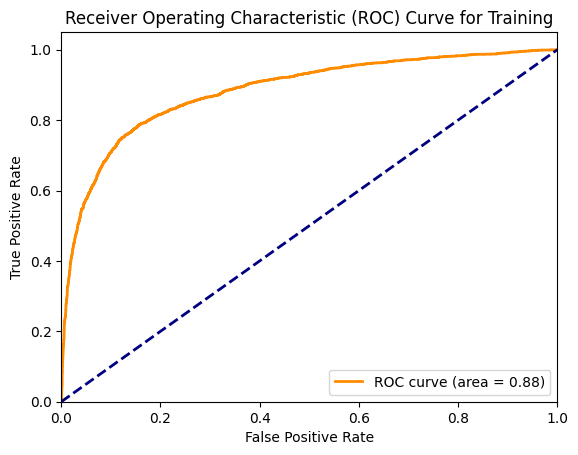

AUROC for Validation: 0.88


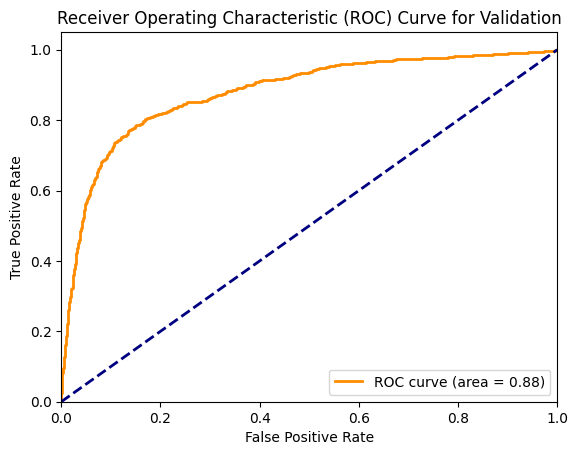

In [186]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

**AUROC тренувального та валідаційного наборів даних показує, що модель є хорошою.**

**F1 Score**

In [189]:
from sklearn.metrics import f1_score 

In [190]:
preds = model.predict(X_train)
preds[:5], train_targets[:5]

(array([0., 0., 0., 0., 0.]),
 8263     0.0
 14199    1.0
 1856     0.0
 3013     0.0
 8266     0.0
 Name: Exited, dtype: float64)

In [192]:
f1_score(train_targets, preds, pos_label=1)

0.6378822924698021

In [195]:
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1)
  print(f"F1 score {name}: {f1_score_:.2f}%")

In [196]:
get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.64%
F1 score Validation: 0.63%


8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [198]:
from sklearn.metrics import accuracy_score

In [201]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [205]:
print("Accuracy для тренувального:", accuracy_score(train_targets, train_preds))
print("Accuracy для валідаційного:", accuracy_score(val_targets, val_preds))

Accuracy для тренувального: 0.8747555555555555
Accuracy для валідаційного: 0.8709333333333333


***Передбачення моделі, яка передбачає завжди мажоритарний клас - спочатку це мене поставило в ступор. Однак Потів зрозумів, що це ж передбачення, яке в голові можна зробити. У нас 80% класу 0, тому точність буде 80%, оскільки модель передбачить всі значення класу 0.***

In [217]:
train_preds_majority = np.zeros(len(train_targets), dtype=int)
val_preds_majority   = np.zeros(len(val_targets), dtype=int)

In [210]:
print("Accuracy для тренувального (мажоритарний клас):", accuracy_score(train_targets, train_preds_majority))
print("Accuracy для валідаційного (мажоритарний клас)", accuracy_score(val_targets, val_preds_majority))

Accuracy для тренувального (мажоритарний клас): 0.7965333333333333
Accuracy для валідаційного (мажоритарний клас) 0.7965333333333333


**Підсумок: Точність мажоритарної моделі близько 80%, тоді а точність натренованої моделі близько 87% на валідаційних даних. В попередньому завданні AUROC був 0.88 та F1 був 0.63. Модель має хорошу здатність розділяти класи та не перенавчена (тут звичайно мабуть результат того, що я заюзав stratified). Наразі роблю висновок, що якість моделі хороша.**

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [220]:
import joblib

In [221]:
casa_de_papel = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [223]:
joblib.dump(casa_de_papel, 'log_reg.joblib')

['log_reg.joblib']

In [224]:
casa_de_papel_2 = joblib.load('log_reg.joblib')

In [225]:
model_2 = casa_de_papel_2["model"]

In [226]:
model_2.predict(X_val)[:5] 

array([0., 1., 0., 0., 0.])

Ще перевірив, чи працює

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [228]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [229]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

array([0.00642569, 0.03706968, 0.36971138, 0.37670638, 0.97583457])

**Я не сильно відходив від запропонованих назв змінних, тому змін мінімальні**

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [260]:
test_raw_df.shape

(10000, 19)

In [231]:
test_raw_df = pd.read_csv("test.csv")

In [235]:
test_raw_df["Exited"] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

In [236]:
# перевірка
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,0.365155,Germany,Male,0.222222,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,0.074950
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.388889,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,0.034767
2,15002,15716284.0,Onyekachi,0.656325,France,Male,0.462963,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,0.150961
3,15003,15785078.0,Martin,0.682578,Spain,Male,0.500000,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,0.196458
4,15004,15662955.0,Kenechukwu,0.384248,Spain,Male,0.462963,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,0.055247


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [251]:
sample_submission = pd.read_csv("sample_submission.csv")

In [252]:
sample_submission.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [253]:
sample_submission['Exited'] = test_raw_df['Exited']

In [254]:
sample_submission.head()

,id,Exited
0,15000,0.074950
1,15001,0.034767
2,15002,0.150961
3,15003,0.196458
4,15004,0.055247


In [255]:
sample_submission.to_csv("submission_log_reg.csv", index=False)

In [256]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0C8B-602A

 Directory of C:\Users\yevhe\OneDrive\Documents\ML_Course\Module 2.2 2.0\Kaggle 2.0

21.02.2026  02:47    <DIR>          .
20.02.2026  19:23    <DIR>          ..
16.02.2026  00:30    <DIR>          .ipynb_checkpoints
21.02.2026  02:17             3я885 casa_de_papel.joblib
21.02.2026  02:47           363я281 HW_2_2_‹®Ј?бвЁз­ _аҐЈаҐб?п_§_scikit_learn_Anhel_Y.ipynb
21.02.2026  02:24             3я885 log_reg.joblib
15.02.2026  23:36            15я138 regression_data.csv
16.02.2026  00:29           100я010 sample_submission.csv
21.02.2026  02:47           268я860 submission_log_reg.csv
16.02.2026  00:29           801я708 test.csv
16.02.2026  00:29         1я249я869 train.csv
20.02.2026  19:25           218я773 train_inputs.parquet
20.02.2026  19:26            68я731 train_targets.parquet
20.02.2026  19:25            88я656 val_inputs.parquet
20.02.2026  19:26            23я425 val_targets.parquet
              12 File(s)   

In [257]:
pd.read_csv("submission_log_reg.csv").head()

,id,Exited
0,15000,0.074950
1,15001,0.034767
2,15002,0.150961
3,15003,0.196458
4,15004,0.055247


In [258]:
sample_submission['Exited'].describe()

count    10000.000000
mean         0.212722
std          0.255538
min          0.000688
25%          0.034802
50%          0.094728
75%          0.285268
max          0.993969
Name: Exited, dtype: float64